In [246]:
import numpy as np
import pandas as pd

In [248]:
import chardet

with open('spam.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
print(f"Detected encoding: {encoding}")

Detected encoding: Windows-1252


In [249]:
df = pd.read_csv('spam.csv', encoding='Windows-1252')

In [250]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [254]:
df.shape

(5572, 5)

## 1.Data Cleaning

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [258]:
#drop last 3 columns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [260]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [262]:
# renaming columns using dict

df.rename(columns={'v1':'target', 'v2':'text'},inplace=True)

In [264]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [266]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [268]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [270]:
# Checking missing values
df.isna().sum()

target    0
text      0
dtype: int64

In [272]:
#check for duplicated values
df.duplicated().sum()

403

In [274]:
#removing duplicate values
df = df.drop_duplicates(keep='first')

In [276]:
df.duplicated().sum()

0

In [278]:
df.shape

(5169, 2)

## 2.EDA

In [280]:
# First thing we will check what % of data is spam and ham
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

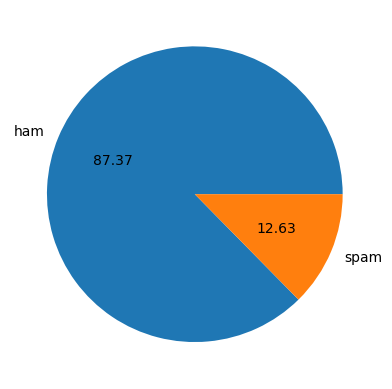

In [282]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%.02f')
plt.show()

In [1116]:
# Data is imbalance

In [284]:
import nltk

In [286]:
nltk.download('punkt_tab')
# there are certain dependencies for nltk to work.

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/Chetan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [288]:
#Fetching number of characters
df['num_characters']=df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [290]:
#Fetching number of words
df['num_words']=df['text'].apply(lambda x :len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [292]:
#Fetching number of sentences
df['num_sentence']=df['text'].apply(lambda x :len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [312]:
#describe function on spam messages
df[df['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [125]:
#describe function on ham messages
df[df['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

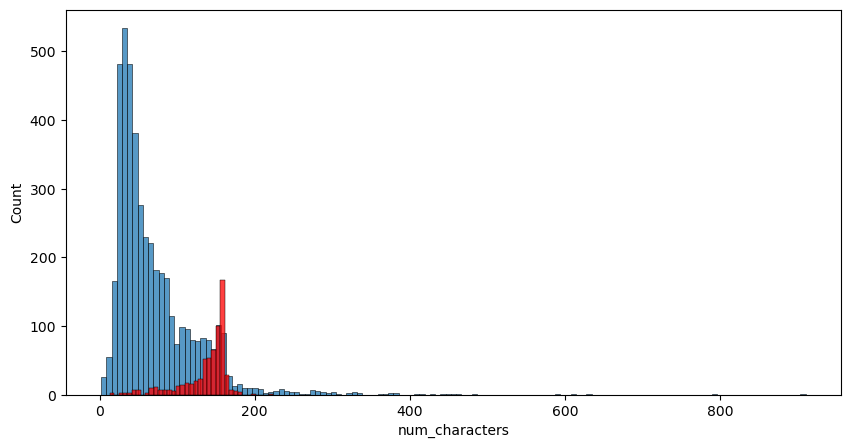

In [314]:
#Plotting histogram graphs
import seaborn as sns
plt.figure(figsize=(10,5))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

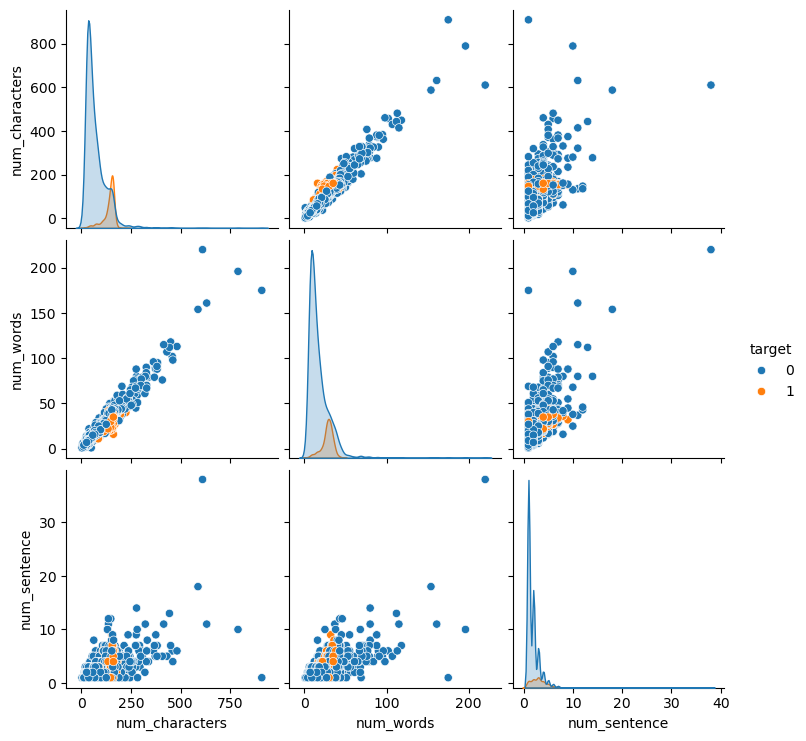

In [316]:
sns.pairplot(df,hue='target')

In [59]:
#Removing Outliers
df = df[df['num_characters']<350]

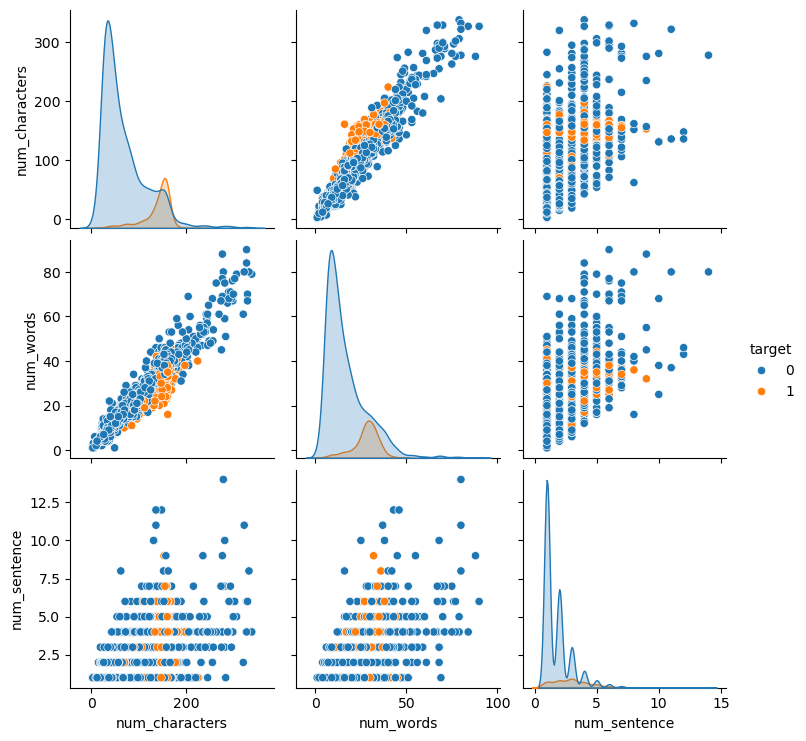

In [61]:
sns.pairplot(df,hue='target')

<Axes: >

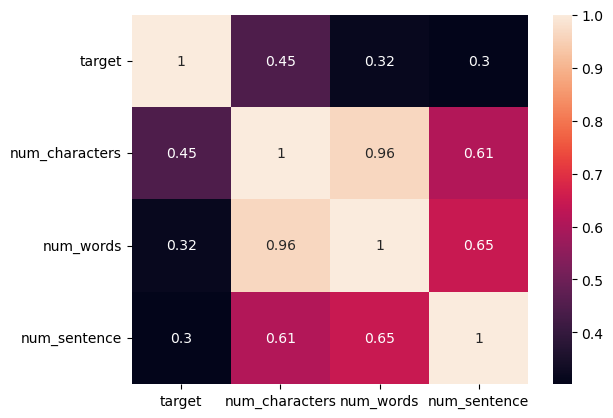

In [63]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## Data Preprocessing

In [190]:


from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]  #cloning
    y.clear()

    for i in text:
       if i not in stopwords.words('english'):
          y.append(i)

    text=y[:]  #cloning
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [158]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [166]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [154]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [192]:
#checking above code 
transform_text("But i'll b going 2 sch on mon. My sis need 2 take smth??.")

'b go 2 sch mon si need 2 take smth'

In [194]:
df['transform_text']=df['text'].apply(transform_text)
df.head()

/var/folders/m9/1pbgwd4s3x398d4qxtk047tw0000gn/T/ipykernel_47260/2672829847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transform_text']=df['text'].apply(transform_text)


,target,text,num_characters,num_words,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [1155]:
#Creating WordCloud imp words are visible in large

from wordcloud import WordCloud
wc=WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [1157]:
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

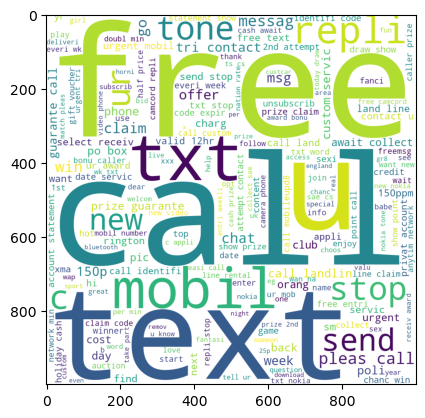

In [1158]:
plt.imshow(spam_wc)

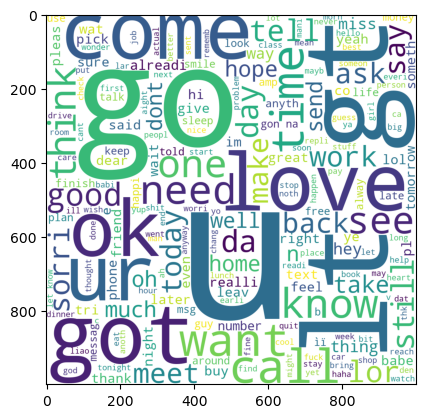

In [1161]:
spam_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [1163]:
df.head()

,target,text,num_characters,num_words,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [196]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [198]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [1169]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


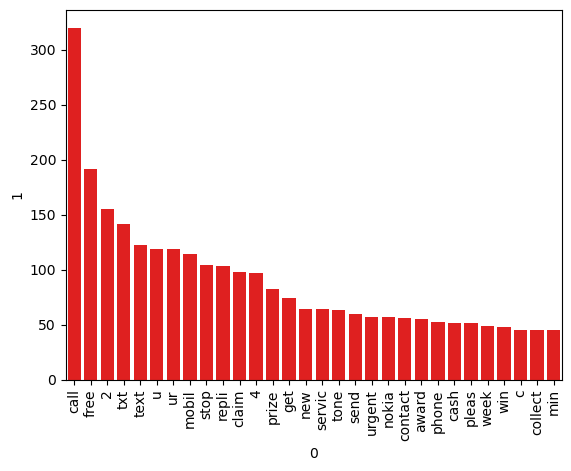

In [1171]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],color='red')
plt.xticks(rotation='vertical')
plt.show()

In [1173]:
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

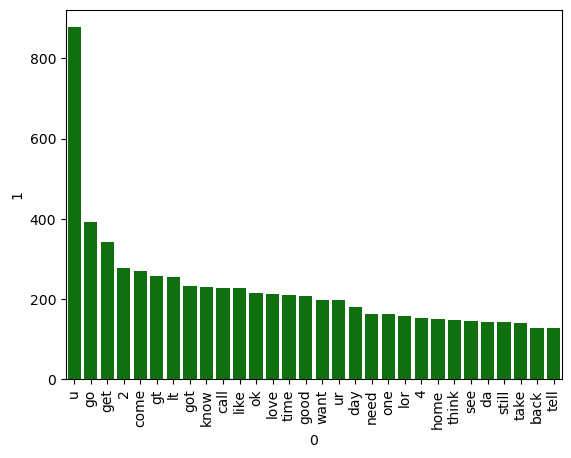

In [1175]:

sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],color='green')
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [230]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [236]:
tfidf = TfidfVectorizer(max_features=3000)

In [238]:
X= tfidf.fit_transform(df['transform_text']).toarray()

In [2010]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [206]:
X.shape

(5149, 3000)

In [208]:
y=df['target'].values

In [210]:
y.shape

(5149,)

In [212]:
from sklearn.model_selection import train_test_split

In [214]:
X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [216]:
print(y_train.shape)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(1030, 3000)
(4119, 3000)
(4119,)
(1030,)


In [218]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [220]:
gnb=GaussianNB()
mnb=MultinomialNB()
Bnb=BernoulliNB()

In [222]:
gnb.fit(X_train,X_test)
ypred1=gnb.predict(y_train)
print(accuracy_score(y_test,ypred1))
print(confusion_matrix(y_test,ypred1))
print(precision_score(y_test,ypred1))

0.870873786407767
[[803 113]
 [ 20  94]]
0.45410628019323673


In [224]:
mnb.fit(X_train,X_test)
ypred2=mnb.predict(y_train)
print(accuracy_score(y_test,ypred2))
print(confusion_matrix(y_test,ypred2))
print(precision_score(y_test,ypred2))

0.9815533980582525
[[916   0]
 [ 19  95]]
1.0


In [1792]:
Bnb.fit(X_train,X_test)
ypred3=Bnb.predict(y_train)
print(accuracy_score(y_test,ypred3))
print(confusion_matrix(y_test,ypred3))
print(precision_score(y_test,ypred3))

0.9766990291262136
[[913   3]
 [ 21  93]]
0.96875


In [2018]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2020]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [2022]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [2024]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,X_test)
    ypred=clf.predict(y_train)
    accuracy=accuracy_score(y_test,ypred)
    precision=precision_score(y_test,ypred)

    return accuracy,precision

In [1962]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9825242718446602, 0.9615384615384616)

In [2026]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [1825]:
df_prediction= pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [1828]:
df_prediction

,Algorithm,Accuracy,Precision
0,SVC,0.977670,0.933333
1,KN,0.914563,1.000000
2,NB,0.970874,1.000000
3,DT,0.952427,0.792793
4,LR,0.964078,0.905263
5,RF,0.978641,1.000000
6,AdaBoost,0.968932,0.859649
7,BgC,0.963107,0.822034
8,ETC,0.981553,1.000000
9,GBDT,0.967961,0.909091


In [1599]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [1966]:
new_df= pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3k':accuracy_scores,'Precision_max_ft_3k':precision_scores})

In [1968]:
new_df = df_prediction.merge(new_df,on='Algorithm')

In [1970]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3k,Precision_max_ft_3k
0,SVC,0.977670,0.933333,0.982524,0.961538
1,KN,0.914563,1.000000,0.919417,1.000000
2,NB,0.970874,1.000000,0.981553,1.000000
3,DT,0.952427,0.792793,0.947573,0.777778
4,LR,0.964078,0.905263,0.966019,0.898990
5,RF,0.978641,1.000000,0.978641,0.979167
6,AdaBoost,0.968932,0.859649,0.966019,0.837607
7,BgC,0.963107,0.822034,0.962136,0.809917
8,ETC,0.981553,1.000000,0.978641,0.969388
9,GBDT,0.967961,0.909091,0.968932,0.936170


In [2032]:
# 2. Applying MinMaxScaler 
scaled_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaled':accuracy_scores,'Precision_scaled':precision_scores})

In [2034]:
scaled_df=new_df.merge(scaled_df,on='Algorithm')

In [1832]:
#Voting Classifier
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [1834]:
voting = VotingClassifier(estimators=[('NB',mnb),('RF',rfc),('ET',etc)],voting='soft')

In [1836]:
voting.fit(X_train,X_test)

VotingClassifier(estimators=[('NB', MultinomialNB()),
                             ('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('ET',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [1838]:
y_pred=voting.predict(y_train)
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))

Accuracy Score:  0.9796116504854369
Precision Score:  1.0


In [1974]:
#Applying Stacking
from sklearn.ensemble import StackingClassifier

stacking=StackingClassifier(estimators=[('NB',mnb),('RF',rfc),('ET',etc)],final_estimator=ExtraTreesClassifier())
stacking.fit(X_train,X_test)
y_pred=stacking.predict(y_train)
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))

Accuracy Score:  0.9815533980582525
Precision Score:  0.9203539823008849


In [226]:
import pickle
pickle.dump(tfidf,open('sms-vectorizer.pkl','wb'))
pickle.dump(mnb,open('sms-model.pkl','wb'))